In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_1=pd.read_csv("AUG19.csv")
df_2=pd.read_csv("SEP19.csv")
df_1.shape  #(26681, 17)
df_2.shape  #(26895, 17)
#same nos. of columns so df can be concatenated by columns

(26895, 17)

In [3]:
df_combined=pd.concat([df_1,df_2],axis=0)
df_combined.shape

(53576, 17)

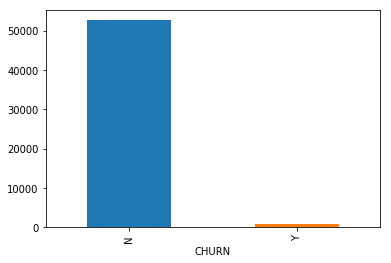

In [4]:
df_combined['CHURN'].value_counts()
#here we visualize the imbalance in the dataset

temp_a=df_combined.groupby(['CHURN']).size()
temp_a.plot.bar()

In [5]:
#checking the dataset for nulls
#df_combined.isnull().sum()
100*(df_combined.isnull().mean())

IMAGE                 0.000000
GN                    0.033597
CN                    0.011199
ACCT_NO               0.000000
CONT_NO               0.000000
LINE_NO               0.000000
LINE_STAT             0.000000
SERV_CODE             0.000000
BILL_CYCL             0.000000
DISTRICT              0.000000
TENURE                0.000000
CHURN                 0.000000
SECURED_REVENUE       5.349410
CHURN_REASON         98.280947
CHURN_GROUP          98.295879
CURRENT_MTH_CHURN     0.000000
COSTCENTRE            0.000000
dtype: float64

In [6]:
#dimensionality reduction has got 2types :feature elimination/feature extraction.Here we are doing feature elimination.
#dropping features having >95% nulls
df_combined_nulldrop=df_combined.drop(['CHURN_REASON','CHURN_GROUP'],axis=1)
df_combined_nulldrop.isnull().sum()

IMAGE                   0
GN                     18
CN                      6
ACCT_NO                 0
CONT_NO                 0
LINE_NO                 0
LINE_STAT               0
SERV_CODE               0
BILL_CYCL               0
DISTRICT                0
TENURE                  0
CHURN                   0
SECURED_REVENUE      2866
CURRENT_MTH_CHURN       0
COSTCENTRE              0
dtype: int64

In [7]:
#Imputing SECURED_REVENUE 
median_secured_revenue=df_combined_nulldrop["SECURED_REVENUE"].median()
df_combined_nulldrop["SECURED_REVENUE"].fillna(value=median_secured_revenue, inplace = True)

#dropping serial no. type columns
df_combined_nulldrop=df_combined_nulldrop.drop(['GN','CN'],axis=1)

In [8]:
#separating the output variable 'CHURN'
df_3=df_combined_nulldrop
y=df_3['CHURN']
df_3=df_3.drop(['CHURN'],axis=1)

In [9]:
#changing other datatypes
df_3['BILL_CYCL']=pd.Categorical(df_3.BILL_CYCL)
df_3['COSTCENTRE']=pd.Categorical(df_3.COSTCENTRE)
df_3['CURRENT_MTH_CHURN']=pd.Categorical(df_3.CURRENT_MTH_CHURN)
df_3['DISTRICT']=pd.Categorical(df_3.DISTRICT)
df_3['SERV_CODE']=pd.Categorical(df_3.SERV_CODE)
df_3['LINE_STAT']=pd.Categorical(df_3.LINE_STAT)
df_3['LINE_NO']=pd.Categorical(df_3.LINE_NO)
df_3=df_3.drop(['ACCT_NO','CONT_NO','IMAGE'],axis=1)

In [10]:
y.dtype

dtype('O')

In [11]:
df_3['DISTRICT']=df_3['DISTRICT'].astype(str)
df_3.dtypes

LINE_NO              category
LINE_STAT            category
SERV_CODE            category
BILL_CYCL            category
DISTRICT               object
TENURE                  int64
SECURED_REVENUE       float64
CURRENT_MTH_CHURN    category
COSTCENTRE           category
dtype: object

In [12]:
df_3=df_3.drop(['LINE_NO'],axis=1)

In [13]:
#One hot encoding
df_ohe=pd.get_dummies(df_3)
df_ohe.shape

(53576, 469)

In [14]:
X=df_ohe

In [15]:
#replacing Y by 1 & N by 0 to avoid below error
#ValueError: could not convert string to float: 'N'
y.replace(('Y','N'), (1, 0), inplace=True)

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [17]:
#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
#and gives it performance and efficiency gains.
#D_train = xgb.DMatrix(X_train,Y_train)

In [18]:
#D_test = xgb.DMatrix(X_test, label=Y_test)


In [19]:
#default values n_estimator=100;learning_rate=0.1;max_depth=3
model_xgb=xgb.XGBClassifier().fit(X_train,Y_train)

In [28]:
#now changing parameters n_estimator=70;learning_rate=0.2;max_depth=5
model_xgb_1=xgb.XGBClassifier(max_depth=5,learning_rate=0.5,n_estimators=60).fit(X_train,Y_train)

In [29]:
Y_pred_1 = model_xgb_1.predict(X_test)
print(classification_report(Y_test, Y_pred_1))


             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15797
          1       0.98      0.70      0.82       276

avg / total       0.99      0.99      0.99     16073



C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
print('Accuracy of XGB classifier on training set:{:.2f} '.format(model_xgb.score(X_train, Y_train)))

Accuracy of XGB classifier on training set:0.99 


C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
Y_pred = model_xgb.predict(X_test)
print(classification_report(Y_test, Y_pred))


             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15797
          1       1.00      0.69      0.82       276

avg / total       0.99      0.99      0.99     16073



C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
#run random forest classifier on the same data
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,Y_train)
y_pred_rf=model_rf.predict(X_test)





C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
print(classification_report(Y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     15797
          1       0.97      0.72      0.82       276

avg / total       0.99      0.99      0.99     16073



In [24]:
#run logistic regression on the same data
from sklearn.linear_model import LogisticRegression
lr=RandomForestClassifier()
model_lr=lr.fit(X_train,Y_train)
y_pred_lr=model_lr.predict(X_test)
print(classification_report(Y_test,y_pred_lr))


             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15797
          1       0.93      0.71      0.80       276

avg / total       0.99      0.99      0.99     16073

